In [1]:
import requests
import random
import json
import base64
from IPython.display import display, SVG

In [2]:
baseUrl = "http://localhost:8081"
keycloak_url = "http://keycloak:8080"

In [3]:
# For admin token generation
headers = {
    'content-type': 'application/x-www-form-urlencoded',
}

userId = 'admin'

data = {
  'client_id': 'registry-frontend',
  'username': userId,
  'password': 'abcd@123',
  'grant_type': 'password'
}

response = requests.post('%s/auth/realms/sunbird-rc/protocol/openid-connect/token'%(keycloak_url), headers=headers, data=data)
token = response.json()["access_token"]
print(token)

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJZUHc4MWFDNjNRUUpYSnAyWVhkbTh4amxxaDZaZ05BRVp5MXlEdlBTTVQwIn0.eyJleHAiOjE2ODE5NjgxMTcsImlhdCI6MTY4MTk2NzUxNywianRpIjoiNjZiYTM1OTAtYTQyNS00NjM2LWI4MTEtZjdiYTRhYTVkMjM2IiwiaXNzIjoiaHR0cDovL2tleWNsb2FrOjgwODAvYXV0aC9yZWFsbXMvc3VuYmlyZC1yYyIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiJlZDAzZGZmNS0yZmFjLTRlM2ItOGNjMy0yYTMwNmNkYzMwMDciLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWdpc3RyeS1mcm9udGVuZCIsInNlc3Npb25fc3RhdGUiOiJlNmEzZmZhOS0wMTJiLTQyOTUtYjk1MS1iZmY1ZjNhNzAzMzYiLCJhY3IiOiIxIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwczovL2xvY2FsaG9zdDo0MjAwIiwiaHR0cHM6Ly9uZGVhci54aXYuaW4iLCJodHRwOi8vbG9jYWxob3N0OjQyMDAiLCJodHRwOi8vbmRlYXIueGl2LmluIiwiaHR0cDovLzIwLjE5OC42NC4xMjgiXSwicmVhbG1fYWNjZXNzIjp7InJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwiYWRtaW4iLCJ1bWFfYXV0aG9yaXphdGlvbiIsImRlZmF1bHQtcm9sZXMtbmRlYXIiXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50IiwibWFuYWdlLWFjY291bnQtbGlua3MiLCJ2aWV3LXBy

In [4]:
#create issuer
issuerUserId = "scholarship"
def createIssuer():
    payload = json.dumps({
      "websiteUrl": "",
      "name": "Scholarship",
      "accountDetails": {
        "userId": issuerUserId
      },
      "sectorType": "Education",
      "logoUrl": "https://raw.githubusercontent.com/chaitrali-r/federated-education-registry/main/src/assets/images/scholarship.svg",
      "contactDetails": {
        "email": issuerUserId
      }
    })
    headers = {
        'Content-Type': 'application/json',
        'Authorization': 'Bearer %s'%token
    }
    response = requests.post('%s/api/v1/Issuer/invite'%(baseUrl), headers=headers, data=payload)
    return response.json()["result"]['Issuer']["osid"]

    
issuerId = createIssuer()

In [5]:
#create issuer token
headers = {
    'content-type': 'application/x-www-form-urlencoded',
}
data = {
  'client_id': 'registry-frontend',
  'username': issuerUserId,
  'password': 'abcd@123',
  'grant_type': 'password'
}

response = requests.post('%s/auth/realms/sunbird-rc/protocol/openid-connect/token'%(keycloak_url), headers=headers, data=data)
issuerToken = response.json()["access_token"]
print(issuerToken)

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJZUHc4MWFDNjNRUUpYSnAyWVhkbTh4amxxaDZaZ05BRVp5MXlEdlBTTVQwIn0.eyJleHAiOjE2ODE5NjgyOTcsImlhdCI6MTY4MTk2NzY5NywianRpIjoiYzZlZjIyOGQtNGM5OC00Yjg2LWFmMzQtZGJlZjRkMjFlYzdhIiwiaXNzIjoiaHR0cDovL2tleWNsb2FrOjgwODAvYXV0aC9yZWFsbXMvc3VuYmlyZC1yYyIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiIyNjVlY2EyNi1kZTA4LTRlODUtYTM2Mi1jMTU4NzRiNDM2NDkiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWdpc3RyeS1mcm9udGVuZCIsInNlc3Npb25fc3RhdGUiOiIwYzAyZTVkNy0yM2RkLTQzMWEtODUyMS0yNzlhYmUwMDczZGMiLCJhY3IiOiIxIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwczovL2xvY2FsaG9zdDo0MjAwIiwiaHR0cHM6Ly9uZGVhci54aXYuaW4iLCJodHRwOi8vbG9jYWxob3N0OjQyMDAiLCJodHRwOi8vbmRlYXIueGl2LmluIiwiaHR0cDovLzIwLjE5OC42NC4xMjgiXSwicmVhbG1fYWNjZXNzIjp7InJvbGVzIjpbIklzc3VlciIsInNjaG9sYXJzaGlwIiwib2ZmbGluZV9hY2Nlc3MiLCJhZG1pbiIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1uZGVhciJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2Ut

In [6]:
# upload template
def uploadTemplate(entityName, entityId):
    payload = {}
    files=[
      ('files',('prematricscholarship.svg',open('./schema_templates/prematricscholarship.svg','rb'),'image/svg+xml'))
    ]
    headers = {
        'Authorization': 'Bearer %s'%issuerToken
    }
    response = requests.post('%s/api/v1/%s/%s/templates/documents'%(baseUrl, entityName, entityId), headers=headers, data=payload, files=files)
    response
    return response.json()['documentLocations'][0]
templateUrl = uploadTemplate('Issuer', issuerId)

In [7]:
schemaName = "PreMatricScholarship"
def getSchemaBody(templateUrl):
    return {
      "name": schemaName,
      "schema": "{\n  \"$schema\": \"http://json-schema.org/draft-07/schema\",\n  \"type\": \"object\",\n  \"properties\": {\n    \"PreMatricScholarship\": {\n      \"$ref\": \"#/definitions/PreMatricScholarship\"\n    }\n  },\n  \"required\": [\n    \"PreMatricScholarship\"\n  ],\n  \"title\": \"PreMatricScholarship\",\n  \"definitions\": {\n    \"PreMatricScholarship\": {\n      \"$id\": \"#/properties/PreMatricScholarship\",\n      \"type\": \"object\",\n      \"title\": \"The PreMatricScholarship Schema\",\n      \"required\": [\n        \"name\",\n        \"contact\",\n        \"dateofaward\",\n        \"validupto\",\n        \"nameofScheme\",\n        \"email\"\n      ],\n      \"properties\": {\n        \"name\": {\n          \"type\": \"string\",\n          \"title\": \"Name\"\n        },\n        \"email\": {\n          \"type\": \"string\",\n          \"title\": \"Email\"\n        },\n        \"contact\": {\n          \"type\": \"string\",\n          \"title\": \"Contact\"\n        },\n        \"gender\": {\n          \"type\": \"string\",\n          \"title\": \"Gender\"\n        },\n        \"institute\": {\n          \"type\": \"string\",\n          \"title\": \"Institute\"\n        },\n        \"academicYear\": {\n          \"type\": \"string\",\n          \"title\": \"Academic Year\"\n        },\n        \"rollNo\": {\n          \"type\": \"string\",\n          \"title\": \"Roll No\"\n        },\n        \"dateofaward\": {\n          \"type\": \"string\",\n          \"title\": \"Date Of Award\",\n          \"format\": \"date\"\n        },\n        \"validupto\": {\n          \"type\": \"string\",\n          \"title\": \"Valid Till\",\n          \"format\": \"date\"\n        },\n        \"nameofScheme\": {\n          \"type\": \"string\",\n          \"title\": \"Name of Scheme\"\n        }\n      }\n    }\n  },\n  \"_osConfig\": {\n    \"uniqueIndexFields\": [],\n    \"privateFields\": [\"name\"],\n    \"privateFieldConfig\": \"HASH\",\n    \"internalFieldConfig\": \"FULL\",\n    \"ownershipAttributes\": [\n      {\n        \"email\": \"/email\",\n        \"mobile\": \"/contact\",\n        \"userId\": \"/email\"\n      }\n    ],\n    \"systemFields\": [\n      \"osCreatedAt\",\n      \"osUpdatedAt\",\n      \"osCreatedBy\",\n      \"osUpdatedBy\"\n    ],\n    \"roles\": [\"scholarship\"],\n    \"inviteRoles\": [\n      \"anonymous\"\n    ],\n    \"enableLogin\": true,\n    \"credentialTemplate\": {\n      \"@context\": [\n        \"https://www.w3.org/2018/credentials/v1\",\n        \"https://gist.githubusercontent.com/varadeth/c9cc5950f965dbc9f67e4e9bfa91a35b/raw/c934bd3c9cc24fdc0e840db81f105cf3c348a99e/prematricscholarship.json\"\n      ],\n      \"type\": [\n        \"VerifiableCredential\"\n      ],\n      \"issuanceDate\": \"{{osCreatedAt}}\",\n      \"credentialSubject\": {\n        \"type\": \"Student\",\n        \"name\": \"{{name}}\",\n        \"gender\": \"{{gender}}\",\n        \"institute\": \"{{institute}}\",\n        \"academicYear\": \"{{academicYear}}\",\n        \"rollNo\": \"{{rollNo}}\"\n      },\n      \"evidence\": {\n        \"type\": \"Scholarship\",\n        \"nameofScheme\": \"{{nameofScheme}}\",\n        \"dateofaward\": \"{{dateofaward}}\",\n        \"validupto\": \"{{validupto}}\"\n      },\n      \"issuer\": \"did:web:sunbirdrc.dev/vc/scholarship\"\n    },\n    \"certificateTemplates\": {\n      \"html\": \"minio://%s\"\n    }\n  }\n}"%(templateUrl),
      "status": "PUBLISHED"
    }

In [8]:
# create a schema
headers = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer %s'%issuerToken, 
}
entity_name = 'Schema'
data = getSchemaBody(templateUrl)
response = requests.post('%s/api/v1/%s'%(baseUrl, entity_name), headers=headers, json=data)
print(response.status_code)
schemaOsid = response.json()["result"]['Schema']["osid"]
print(schemaOsid)

200
1-a41f6724-76b3-43ec-8f43-93cb1c66d03d


In [9]:
# create a credential
headers = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer %s'%issuerToken, 
}
userId = "rohit@gmail.com"
data = {
    "name": "Rohit",
    "email": userId,
    "contact": "9811773377",
    "dateofaward": "2023-04-20",
    "validupto": "2024-04-19",
    "nameofScheme": "PreMatricScholarship"
}
response = requests.post('%s/api/v1/%s'%(baseUrl, schemaName), headers=headers, json=data)
print(response.status_code)
credentialOsid = response.json()["result"]['PreMatricScholarship']["osid"]
print(credentialOsid)

200
1-d9ebd380-cd71-4149-9f2a-5cb720bda425


In [10]:
# get a user token
headers = {
    'content-type': 'application/x-www-form-urlencoded',
}
data = {
  'client_id': 'registry-frontend',
  'username': userId,
  'password': 'abcd@123',
  'grant_type': 'password'
}

response = requests.post('%s/auth/realms/sunbird-rc/protocol/openid-connect/token'%(keycloak_url), headers=headers, data=data)
userToken = response.json()["access_token"]
print(userToken)

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJZUHc4MWFDNjNRUUpYSnAyWVhkbTh4amxxaDZaZ05BRVp5MXlEdlBTTVQwIn0.eyJleHAiOjE2ODE5Njg0MjIsImlhdCI6MTY4MTk2NzgyMiwianRpIjoiMmNmNzcwZWQtZGNjMS00NWUyLTllMTYtMmI3MTBjNmRjZTg4IiwiaXNzIjoiaHR0cDovL2tleWNsb2FrOjgwODAvYXV0aC9yZWFsbXMvc3VuYmlyZC1yYyIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiIwMDEyZTU4MC1lYWQ2LTQ1ZWUtYjA2YS00NmIxMTlhY2ViYjIiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWdpc3RyeS1mcm9udGVuZCIsInNlc3Npb25fc3RhdGUiOiIxMzgyZjUxMS00OWQwLTQyMzgtYjRmZC1hODBlYjFlZTAyMjUiLCJhY3IiOiIxIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwczovL2xvY2FsaG9zdDo0MjAwIiwiaHR0cHM6Ly9uZGVhci54aXYuaW4iLCJodHRwOi8vbG9jYWxob3N0OjQyMDAiLCJodHRwOi8vbmRlYXIueGl2LmluIiwiaHR0cDovLzIwLjE5OC42NC4xMjgiXSwicmVhbG1fYWNjZXNzIjp7InJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwidW1hX2F1dGhvcml6YXRpb24iLCJkZWZhdWx0LXJvbGVzLW5kZWFyIiwiUHJlTWF0cmljU2Nob2xhcnNoaXAiXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50IiwibWFuYWdlLWFjY291bnQt

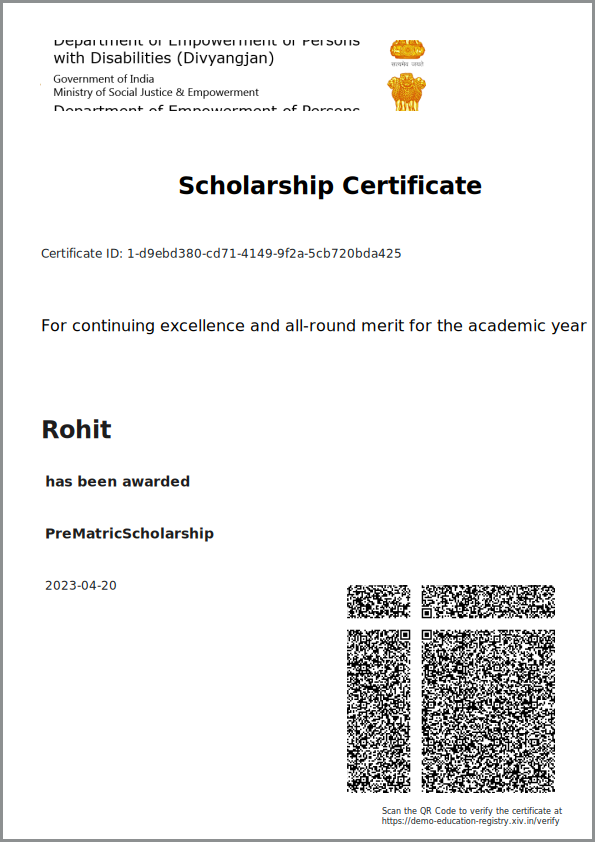

In [11]:
#get a credential
headers = {
    'Accept': 'image/svg+xml',
    'Authorization': 'Bearer %s'%userToken,
    "template-key": "html"
}
response = requests.get('%s/api/v1/%s/%s'%(baseUrl, schemaName, credentialOsid), headers=headers)
display(SVG(response.content))